# airquality analysis v1.0

### Description

This notebook plots airquality data acquired with the airquality measurement station. 

---

### Notebook settings

In [25]:
db_path = 'airquality.db' #path to airquality.db

# configure the timeframe you want to plot
from_timestamp = '2022-03-28 17:39:00'
to_timestamp   = '2022-03-28 18:00:00'

# resample by index 
resample_time = '1Min'
resample = False

### Python import and data query

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

from matplotlib.dates import DateFormatter

%matplotlib inline

In [27]:
con = sqlite3.connect(db_path)

no2 = pd.read_sql_query("SELECT * from NO2", con)
co = pd.read_sql_query("SELECT * from CO", con)
o3 = pd.read_sql_query("SELECT * from O3", con)

no2.index = pd.to_datetime(no2['timestamp'])
co.index = pd.to_datetime(co['timestamp'])
o3.index = pd.to_datetime(o3['timestamp'])

no2.drop(['id', 'timestamp'], axis = 1, inplace = True)
co.drop(['id', 'timestamp'], axis = 1, inplace = True)
o3.drop(['id', 'timestamp'], axis = 1, inplace = True)

no2.head()

,value,unit,temperature,humidity
timestamp,,,,
2022-03-28 17:37:41.222000,0.0072,ppm,19.738000,11.312667
2022-03-28 17:38:30.062539,0.0064,ppm,19.530667,11.470000
2022-03-28 17:39:17.375424,0.0064,ppm,19.328667,11.544000
2022-03-28 17:48:40.195951,0.0064,ppm,16.842667,24.225333
2022-03-28 17:50:54.535684,0.0240,ppm,16.322667,25.245333


### caclulate basic stats

In [28]:
no2 = no2.loc[pd.to_datetime(from_timestamp):pd.to_datetime(to_timestamp)]
co = co.loc[pd.to_datetime(from_timestamp):pd.to_datetime(to_timestamp)]
o3 = o3.loc[pd.to_datetime(from_timestamp):pd.to_datetime(to_timestamp)]

no2_stats = no2.describe()
co_stats = co.describe()
o3_stats = o3.describe()

# print values
print('Average NO2 value: {0:.4f} ppm'.format(no2_stats.value['mean']))
print('Average CO value: {0:.4f} ppm'.format(co_stats.value['mean']))
print('Average O3 value: {0:.4f} ppb'.format(o3_stats.value['mean']))

Average NO2 value: 0.0088 ppm
Average CO value: 0.9041 ppm
Average O3 value: 7.4400 ppb


### Plot timeseries

In [29]:
# resample timeseries to get a better graph
if resample:
    no2 = no2.resample(resample_time).mean()
    co = co.resample(resample_time).mean()
    o3 = o3.resample(resample_time).mean()

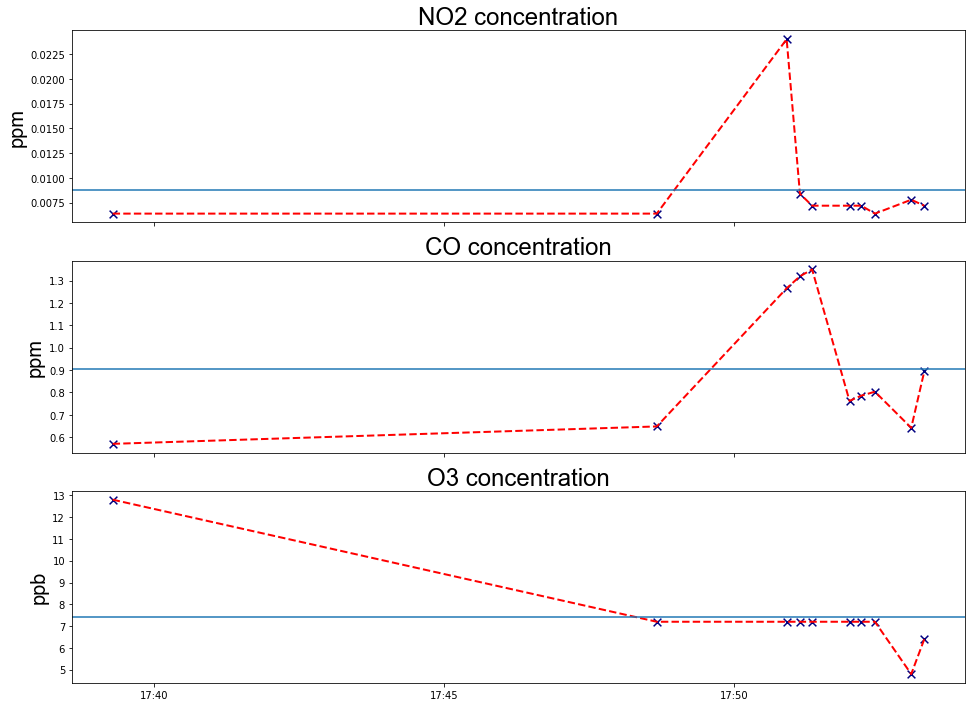

In [40]:
#no2 plot
fig, [ax1, ax2, ax3] = plt.subplots(3,1,figsize=(16,12), sharex = True)

ax1.plot(no2["value"], color = 'r', linewidth = 2, linestyle='--')
ax1.scatter(x=no2.index, y=no2["value"], color = 'navy', marker = 'x', s=60)
ax1.axhline(no2_stats.value['mean'])
ax1.set_title('NO2 concentration', size = 24, font = 'Arial')
ax1.set_ylabel('ppm', size = 20, font = 'Arial')

ax2.plot(co["value"], color = 'r', linewidth = 2, linestyle='--')
ax2.scatter(x=co.index, y=co["value"], color = 'navy', marker = 'x', s=60)
ax2.axhline(co_stats.value['mean'])
ax2.set_title('CO concentration', size = 24, font = 'Arial')
ax2.set_ylabel('ppm', size = 20, font = 'Arial')


ax3.plot(o3["value"], color = 'r', linewidth = 2, linestyle='--')
ax3.scatter(x=o3.index, y=o3["value"], color = 'navy', marker = 'x', s=60)
ax3.axhline(o3_stats.value['mean'])
ax3.set_title('O3 concentration', size = 24, font = 'Arial')
ax3.set_ylabel('ppb', size = 20, font = 'Arial')

hh_mm = DateFormatter('%H:%M')
ax3.xaxis.set_major_formatter(hh_mm)

fig.savefig('concentrations.png')

### Plot temperature and humidity in same timeframe

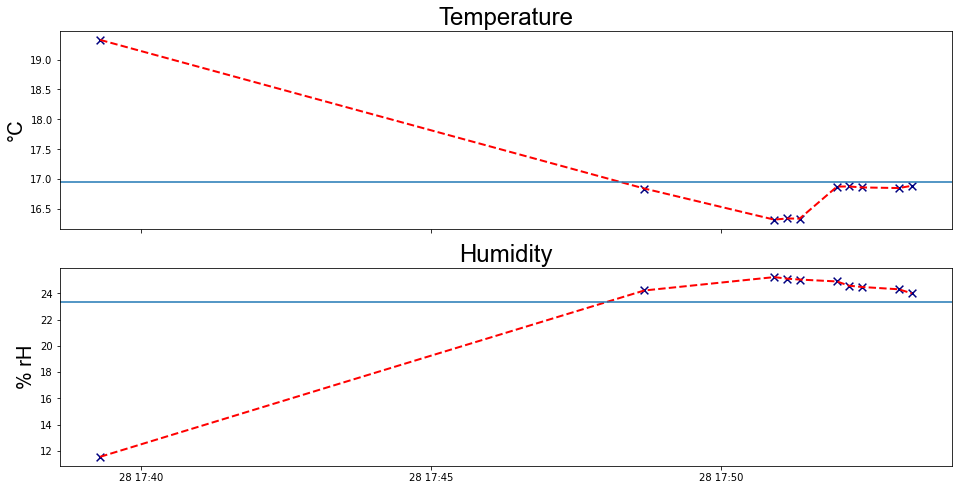

In [42]:
#no2 plot
fig, [ax1, ax2] = plt.subplots(2,1,figsize=(16,8), sharex = True)

ax1.plot(no2["temperature"], color = 'r', linewidth = 2, linestyle='--')
ax1.scatter(x=no2.index, y=no2["temperature"], color = 'navy', marker = 'x', s=60)
ax1.axhline(no2_stats.temperature['mean'])
ax1.set_title('Temperature', size = 24, font = 'Arial')
ax1.set_ylabel('°C', size = 20, font = 'Arial')

ax2.plot(no2["humidity"], color = 'r', linewidth = 2, linestyle='--')
ax2.scatter(x=no2.index, y=no2["humidity"], color = 'navy', marker = 'x', s=60)
ax2.axhline(no2_stats.humidity['mean'])
ax2.set_title('Humidity', size = 24, font = 'Arial')
ax2.set_ylabel('% rH', size = 20, font = 'Arial')

hh_mm = DateFormatter('%H:%M')
ax3.xaxis.set_major_formatter(hh_mm)

fig.savefig('environment.png')